In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cel
Zbudowanie modelu klasyfikującego skoliozę - jako tako udany

# Ładowanie Danych

In [15]:
import os
import cv2
import scripts.image_label_loader as iml

data_dir = 'Datasets/X-Ray/scoliosis'
train_images, train_labels = iml.load_images_and_labels(data_dir, 'train')
valid_images, valid_labels = iml.load_images_and_labels(data_dir, 'valid')
test_images, test_labels = iml.load_images_and_labels(data_dir, 'test')

print(f'Train images: {len(train_images)}, Train labels: {len(train_labels)}')
print(f'Train shape {train_images[0].shape}')
print(f'Valid images: {len(valid_images)}, Valid labels: {len(valid_labels)}')
print(f'Test images: {len(test_images)}, Test labels: {len(test_labels)}')

train_images = np.array(train_images).astype(np.float32)
train_labels = np.array(train_labels).astype(np.float32)
test_images = np.array(test_images).astype(np.float32)
test_labels = np.array(test_labels).astype(np.float32)
valid_images = np.array(valid_images).astype(np.float32)
valid_labels = np.array(valid_labels).astype(np.float32)

train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

Train images: 862, Train labels: 862
Train shape (120, 60, 3)
Valid images: 100, Valid labels: 100
Test images: 100, Test labels: 100


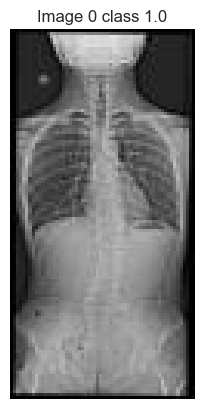

In [19]:
for i in range(0, 1):
    plt.imshow(train_images[i])
    plt.title(f'Image {i} class {train_labels[i]}') 
    plt.axis('off')  
    plt.show()  

# Tworzenie Modelu

In [20]:
import tensorflow
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [21]:
model = Sequential([
    Conv2D(120, (3, 3), activation='relu', input_shape=(120, 60, 3)),  # Użycie 3 kanałów
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(48, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(valid_images, valid_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 422ms/step - accuracy: 0.7695 - loss: 0.4296 - val_accuracy: 0.8800 - val_loss: 0.2182
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 391ms/step - accuracy: 0.9072 - loss: 0.2385 - val_accuracy: 0.9600 - val_loss: 0.3029
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 464ms/step - accuracy: 0.9105 - loss: 0.2865 - val_accuracy: 0.9600 - val_loss: 0.1439
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step - accuracy: 0.9437 - loss: 0.2185 - val_accuracy: 0.9600 - val_loss: 0.1300
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 372ms/step - accuracy: 0.9336 - loss: 0.1746 - val_accuracy: 0.9500 - val_loss: 0.1346
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 413ms/step - accuracy: 0.9585 - loss: 0.1337 - val_accuracy: 0.9000 - val_loss: 0.2556
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 415ms/step - accuracy: 0.9365 - loss: 0.1793 - val_accuracy: 0.9400 - val_loss: 0.2302
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.9464 - loss: 0.1623 - val_accu

# Statystyki Uczenia

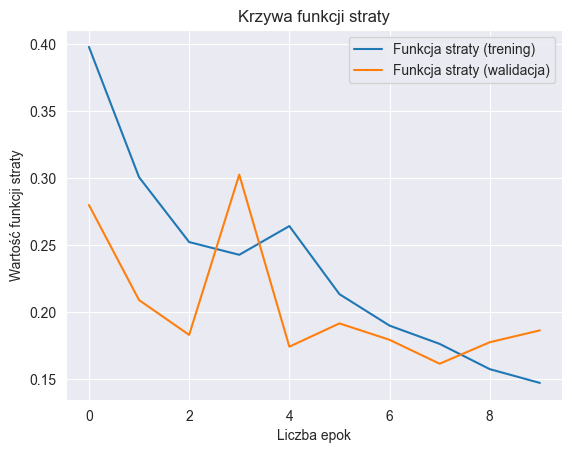

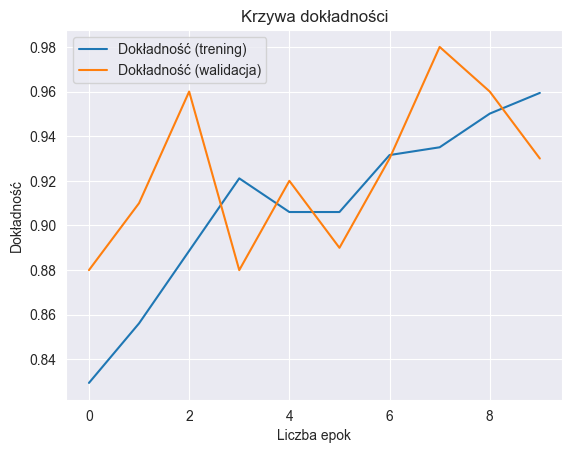

In [7]:
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

In [24]:
print(f"Wymiary testowych danych: {test_images.shape}\n")
pred_label = model.predict(test_images)
print(f"Dane odpowiedzi prosto z modelu: {pred_label}\n")
pred_label = np.where(pred_label > 0.5, 1, 0)
print(f"Dane po konwersji: {pred_label}\n")

Wymiary testowych danych: (100, 120, 60, 3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step 
Dane odpowiedzi prosto z modelu: [[0.99467105]
 [0.9974797 ]
 [0.9992048 ]
 [0.9996354 ]
 [0.9992712 ]
 [0.9998417 ]
 [0.9999981 ]
 [0.99245214]
 [0.9866971 ]
 [0.9998255 ]
 [0.9999782 ]
 [0.99996454]
 [0.9966865 ]
 [0.99748206]
 [0.77752405]
 [0.999996  ]
 [0.9998658 ]
 [0.9898029 ]
 [0.99999744]
 [0.99972534]
 [0.8676243 ]
 [0.9950321 ]
 [0.99999094]
 [0.9997037 ]
 [0.99999964]
 [0.9059621 ]
 [0.99998045]
 [0.9987245 ]
 [0.9985125 ]
 [0.9999983 ]
 [0.9999821 ]
 [0.9999226 ]
 [0.98960656]
 [1.        ]
 [0.99990356]
 [0.999953  ]
 [0.09351043]
 [0.01398679]
 [0.01831273]
 [0.07122832]
 [0.01600455]
 [0.03293522]
 [0.03293522]
 [0.02121638]
 [0.01580497]
 [0.07271107]
 [0.2949082 ]
 [0.01726467]
 [0.01287697]
 [0.01287697]
 [0.0212614 ]
 [0.01171793]
 [0.05345688]
 [0.0238369 ]
 [0.02125071]
 [0.02837717]
 [0.04182541]
 [0.10429467]
 [0.0258393 ]
 [0.02191056]
 [0.33715513]
 [0.04537653]
 [0.04537653]
 

[29 64]


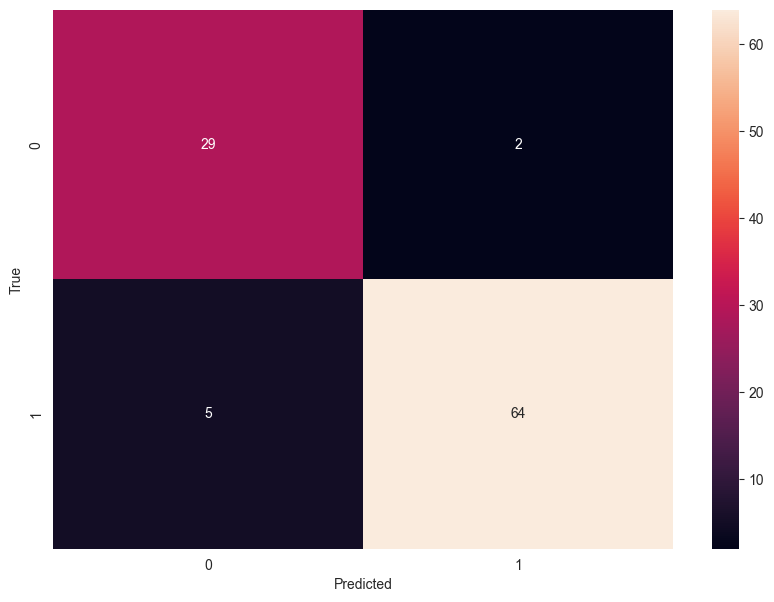

In [25]:
# Obliczenie confusion matrix
cm = confusion_matrix(pred_label, test_labels)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(2)], columns = [i for i in range(2)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
img = cv2.imread('Datasets/X-Ray/scoliosis/new_images/test.jpg')
my_img = []
my_img.append(img)
my_img = np.array(my_img).astype(np.float32)
my_img = my_img / 255.0
my_img.shape

(1,)

In [27]:
prot_lab = model.predict(my_img)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [28]:
prot_lab

NameError: name 'prot_lab' is not defined

TypeError: Invalid shape () for image data

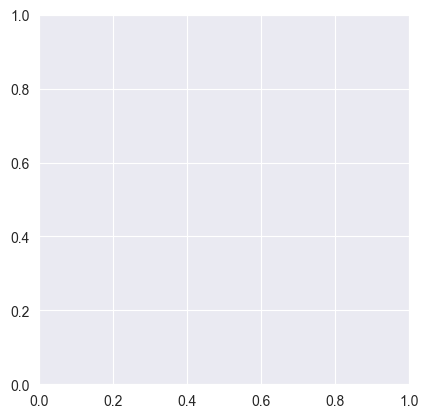

In [29]:
plt.imshow(my_img[0])
plt.title(f'Image {0} class {prot_lab}') 
plt.axis('off')  
plt.show()  

In [ ]:
img = cv2.imread('Datasets/X-Ray/scoliosis/new_images/healthy.jpg')
my_img = []
my_img.append(img)
my_img = np.array(my_img).astype(np.float32)
my_img = my_img / 255.0
my_img.shape

In [ ]:
prot_lab = model.predict(my_img)
prot_lab

In [ ]:
plt.imshow(my_img[0])
plt.title(f'Image {0} class {prot_lab}') 
plt.axis('off')  
plt.show()  